<a href="https://colab.research.google.com/github/vgutierrezmendivil/NeuralNetworks/blob/main/SimplePerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Reconocimiento de dígitos manuscritos con extracción manual de características

El nuevo banco "First bank of Wiki" desea implementar un sistema de reconocimiento automático de cheques como el siguiente:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)


Actualmente, el banco cuenta con un sistema capaz de aislar los dígitos y convertirlos en imágenes de 8 x 8, pero no de reconocer de qué dígito se trata. Por esa razón, nos ha solicitado realizar un módulo capaz de reconocer dígitos manuscritos dada una imagen de 8 x 8 pixeles:


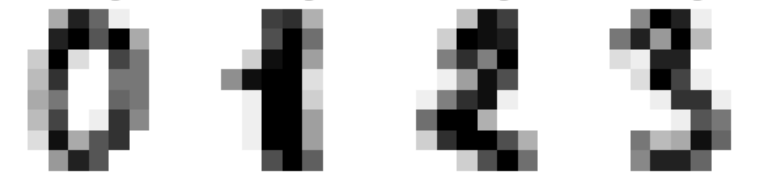



# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

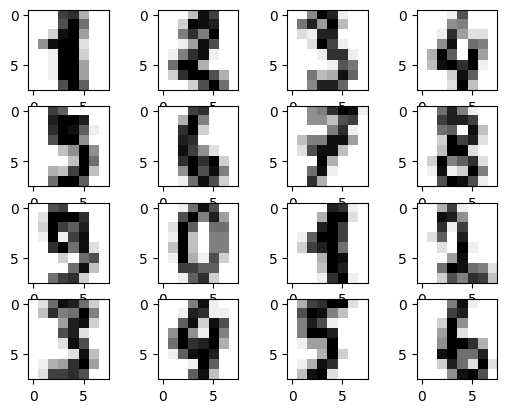

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))

# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [ ]:
# Cargo los dígitos
#X, y = load_digits(return_X_y=True)
X, y = digits.images, digits.target

# Filtro los que sean 0 o 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print("Total de datos para clasificación entre 10 dígitos: " + str(y.shape[0]))
print("Total de datos para clasificación binaria: " + str(y_bin.shape[0]))
print("Total de 1s para clasificación binaria en test: " + str(y_bin_test.sum()))
print("Total de 0s para clasificación binaria en test: " + str(y_bin_test.shape[0] - y_bin_test.sum()))


Total de datos para clasificación entre 10 dígitos: 1797
Total de datos para clasificación binaria: 360
Total de 1s para clasificación binaria en test: 60
Total de 0s para clasificación binaria en test: 59


Visualizamos ahora los dígitos del problema binario

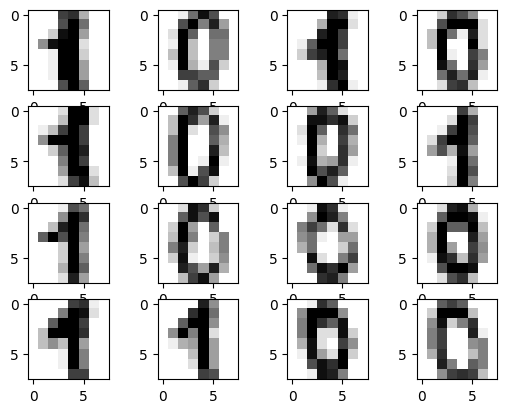

In [ ]:
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_bin[i,:,:], cmap=plt.get_cmap('gray_r'))

# Entrenando un perceptrón simple con extracción manual de características para clasificación binaria

Ahora procederemos a entrenar un perceptrón usando la biblioteca Scikit Learn. Esta biblioteca de aprendizaje automático implementa muchísimos modelos listos para usar. En este caso, usaremos el perceptrón simple `sklearn.linear_model.Perceptron`

Pero antes de definir el perceptrón, vamos a definir el método de extracción de características que transformará una imagen (`np.array`) de 8 x 8 en un vector unidimensional de 2 componentes. Para ello, podemos probar con dos estrategias diferentes (si se les ocurre alguna otra, adelante!):

* **Estrategia 1:** vamos a considerar la feature 0 como la media de intensidades de la parte superior del dígito (filas 0 a 3) y y la feature 1 como la media de la parte inferior (filas 4 a 7) tal como indica la imagen:

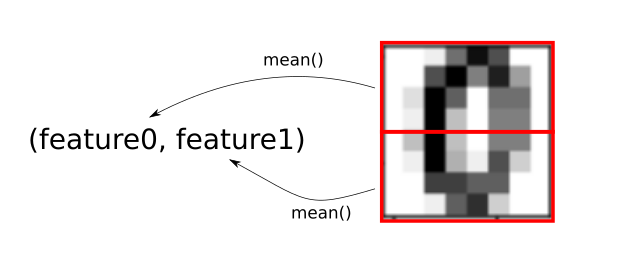

* **Estrategia 2:** Como alternativa, vamos a considerar la feature 0 como la media de toda la imagen, y la feature 1 como el desvío estandar:

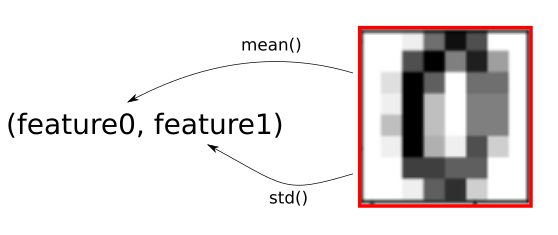


In [ ]:
#def extract_features_mean_std(x):
#  x_out = np.zeros(shape=(1,2))
#  x_out[0,0] = ....
#  x_out[0,1] = ....

#  return x_out

#def extract_features_mean_top_bottom(x):
#  x_out = np.zeros(shape=(1,2))

#  ......

#  return x_out

#def preprocess_features_mean_std(X):
#  X_pp = np.zeros(shape=(X.shape[0], 2))

#  for i in range(X.shape[0]):
#    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

#  return X_pp

#def preprocess_features_mean_top_bottom(X):
#  X_pp = np.zeros(shape=(X.shape[0], 2))

#  for i in range(X.shape[0]):
#    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

#  return X_pp

Ahora implementamos el perceptrón usando la clase `sklearn.linear_model.Perceptron` y lo entrenamos usando las features elegidas (probar con ambas features y ver cuál da mejor accuracy).

In [ ]:
# Definimos un pereceptrón
#clasificador = ...........

# Transformamos las features de los datos para el problema binario
#X_bin_train_features = preprocess_.....( .... )
#X_bin_test_features = preprocess_.....( ...... )

# Entrenamos el clasificador
#clasificador.......

# Imprimir la accuracy en los datos de test.
#print("Accuracy en test: " + str(clasificador.score( ......... )))

# Imprimir las predicciones realizadas para los datos de test

#print("Predictions: " + str(clasificador.predict( ......... )))



# Visualizando las features

Para entender el grado de discriminabilidad que presentan nuestras features, vamos a visualizarlas. Para hacerlo, colorear los items de cada clase con un color diferente.

In [ ]:
#plt.figure()
#plt.scatter( ..... )

# Complicando las cosas:


Ahora volvemos al caso de 10 dígitos y probamos la misma estrategia que estábamos usando anteriormente.

In [ ]:
# Definimos un pereceptrón
#clasificador10 = ........

#X_train_features = preprocess.......(X_train)
#X_test_features = preprocess........(X_test)

#clasificador10.......

# Imprimir la accuracy en los datos de test.
#print("Accuracy en test: " + str(clasificador10.score( ......... )))

# Imprimir las predicciones realizadas para los datos de test

#print("Predictions: " + str(clasificador10.predict( ......... )))

Para intentar entender por qué disminuye tan drásticamente la performance, visualicen las features de las 10 clases coloreando cada punto en un color diferente como hicimos anteriormente.

In [ ]:
#plt.figure()
#plt.scatter( ....... )

# Entregable:
* Deberán entregar el Colab completo con el código funcionando. Además, deberán incluir (en el mismo Colab) un pequeño informe donde muestren las visualizaciones de las features, y responder a las siguientes preguntas:

1. ¿Cuál fue la estrategia de extracción de características que mejor te funcionó? Visualizar las features generadas por los extractores implementados y utilizarlas para explicar por qué funcionó mejor esa estrategia. Si lo desean, pueden proponer sus propias features para mejorar la tasa de acierto del clasfiicador.

2. ¿Cuál sería la accuracy para un algoritmo que prediga aleatoriamente las clases en el caso del problema binario si los datos de test estuvieran balanceados? ¿Y en el caso del problema multiclase de 10 dígitos?

3. El clasificador diseñado en cada caso (binario y multiclase), ¿Funcionó mejor que un clasificador aleatorio?



# Respuesta:



# TP 1: Redes Neuronales

**Autores:**
*   Sergio Gonzalez
*   Victoria Gutierrez
*   Cecilia Sanseverino

## Introducción

En este informe presentamos un estudio comparativo de tres estrategias distintas de análisis de imágenes, aplicadas al conjunto de datos digits de la biblioteca sklearn. Este dataset contiene imágenes digitalizadas de dígitos escritos a mano.

En primera instancia, implementamos las dos estrategias propuestas en la consigna, que se centran en la extracción de características básicas: la media y la desviación estándar de los píxeles de cada imagen:

* **Estrategia 1:** Considera la feature 0 como la media de intensidades de la parte superior del dígito (filas 0 a 3) y y la feature 1 como la media de la parte inferior (filas 4 a 7).

* **Estrategia 2:** Considerar la feature 0 como la media de toda la imagen, y la feature 1 como el desvío estandar.

Utilizamos estas características para entrenar un modelo de perceptrón, utilizando la clase de la librería sklearn (linear_model), con el objetivo de clasificar los dígitos de manera efectiva.

Luego, proponemos una **tercera estrategia**, la cual emplea el análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos, considerando que cada pixel es una feature. Con este método extraemos los componentes principales de las imágenes, esperando que esta reducción de dimensiones (que simplifica el modelo) pueda preservar las características necesarias para la clasificación.

Finalmente, evaluamos el rendimiento del perceptrón en este último caso, comparándolo con los resultados obtenidos con las estrategias iniciales.

Comenzaremos teniendo en cuenta únicamente los dígitos '0' y '1', es decir, resolviendo un problema de clasificación binario y luego extenderemos el análisis a los dígitos del '0' al '9'.

Cargamos las librerías que utilizaremos a lo largo del trabajo.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Cargamos los datos

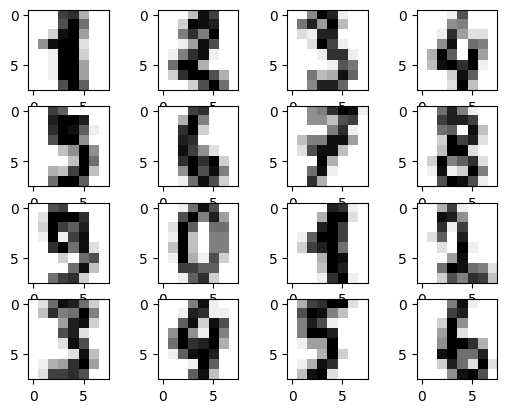

In [ ]:
digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))

Armamos los sets de datos con los que trabajaremos

In [ ]:
X, y = digits.images, digits.target

# Filtro los que sean 0 o 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print("Total de datos para clasificación entre 10 dígitos: " + str(y.shape[0]))
print("Total de datos para clasificación binaria: " + str(y_bin.shape[0]))
print("Total de 1s para clasificación binaria en test: " + str(y_bin_test.sum()))
print("Total de 0s para clasificación binaria en test: " + str(y_bin_test.shape[0] - y_bin_test.sum()))

Total de datos para clasificación entre 10 dígitos: 1797
Total de datos para clasificación binaria: 360
Total de 1s para clasificación binaria en test: 60
Total de 0s para clasificación binaria en test: 59


## Analisis de estrategias

Continuando con el análisis, generamos las funciones que permitirán extraer las características (media y desvío) que necesitamos para entrenar el perceptrón con las primeras dos estrategias.

Recordemos que en la estrategia 1 se divide la imagen en dos mitades (superior e inferior) y se calcula la media de los pixeles de cada parte. Esos serán los dos features que luego se enviarán al percetrón.
En cambio, para la estrategia 2 se determinan dos features considerando por un lado la media de todos los píxeles y, por el otro, el devío estándar.

### Estrategias 1 y 2

In [ ]:
#Estrategia 1
def extract_features_mean_top_bottom(x):
    x_out = np.zeros(shape=(1, 2))
    up_half = x[:4, :]  # Seleccionar la parte superior
    low_half = x[4:, :]  # Seleccionar la parte inferior
    x_out[0, 0] = np.mean(up_half)  # Media superior
    x_out[0, 1] = np.mean(low_half)  # Media inferior
    return x_out

def preprocess_features_mean_top_bottom(X):
    X_pp = np.zeros(shape=(X.shape[0], 2))
    for i in range(X.shape[0]):
        X_pp[i, :] = extract_features_mean_top_bottom(X[i, :, :])
    return X_pp

#Estrategia 2
def extract_features_mean_std(x):
    x_out = np.zeros(shape=(1, 2))
    x_out[0, 0] = np.mean(x)  # Media de la imagen completa
    x_out[0, 1] = np.std(x)   # Desvio de la imagen completa
    return x_out

def preprocess_features_mean_std(X):
    X_pp = np.zeros(shape=(X.shape[0], 2))
    for i in range(X.shape[0]):
        X_pp[i, :] = extract_features_mean_std(X[i, :, :])
    return X_pp

Corremos el perceptrón con las primeras dos estrategias:

In [ ]:
# Estrategia 1
clasificador = Perceptron()
X_bin_train_est1 = preprocess_features_mean_top_bottom(X_bin_train)
X_bin_test_est1 = preprocess_features_mean_top_bottom(X_bin_test)

# Entrenamiento
clasificador.fit(X_bin_train_est1, y_bin_train)

# Evaluación de accuracy
accuracy_est1 = clasificador.score(X_bin_test_est1, y_bin_test)
print("Accuracy de la muestra Test con Estrategia 1: " + str(np.round(accuracy_est1, 4)))

# Predicciones
predictions_est1 = clasificador.predict(X_bin_test_est1)
print("Predicciones de la muestra Test con Estrategia 1: " + str(predictions_est1))


Accuracy de la muestra Test con Estrategia 1: 0.5378
Predicciones de la muestra Test con Estrategia 1: [0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 1 1]


In [ ]:
# Estrategia 2
clasificador = Perceptron()
X_bin_train_est2 = preprocess_features_mean_std(X_bin_train)
X_bin_test_est2 = preprocess_features_mean_std(X_bin_test)

# Entrenamiento
clasificador.fit(X_bin_train_est2, y_bin_train)

# Evaluación de accuracy
accuracy_est2 = clasificador.score(X_bin_test_est2, y_bin_test)
print("Accuracy de la muestra Test con Estrategia 2: " + str(np.round(accuracy_est2, 4)))

# Predicciones
predictions_est2 = clasificador.predict(X_bin_test_est2)
print("Predicciones de la muestra Test con Estrategia 2: " + str(predictions_est2))


Accuracy de la muestra Test con Estrategia 2: 0.8319
Predicciones de la muestra Test con Estrategia 2: [1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 1 0 0]


### Estrategia 3

Ahora trabajaremos con la propuesta nuestra.

Definimos una tercera estrategia donde primero vectorizamos la imagen, para quedarnos con 64 variables (una por cada pixel). Luego, aplicamos el método de PCA para reducción de dimensionalidad a 2 (dos) con componentes principales.

*Nota: Defimos PCA en 2 componentes para que esta estrategia pueda ser comparable con las anteriores.*

Como estas componentes serán las features, para aplicar esta estragegia sólo definiremos la función extract_features_pca:

In [ ]:
# Funcion para obtener las CP de cada observacion dataset de train

def extract_features_pca(x):
    pca = PCA(n_components=2)
    forma_original = x.shape
    matriz_X = x.reshape(forma_original[0], -1)
    principal_components = pca.fit_transform(matriz_X)
    x_out = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
    return x_out

Ahora aplicamos el clasificador del perceptron a las componentes principales

In [ ]:
# Estrategia 3
clasificador = Perceptron()
X_bin_train_est3 = extract_features_pca(X_bin_train)
X_bin_test_est3 = extract_features_pca(X_bin_test)

# Entrenamiento
clasificador.fit(X_bin_train_est3, y_bin_train)

# Evaluación de accuracy
accuracy_est3 = clasificador.score(X_bin_test_est3, y_bin_test)
print("Accuracy de la muestra Test con Estrategia 3: " + str(np.round(accuracy_est3, 4)))

# Predicciones
predictions_est3 = clasificador.predict(X_bin_test_est3)
print("Predicciones de la muestra Test con Estrategia 3: " + str(predictions_est3))

Accuracy de la muestra Test con Estrategia 3: 0.9832
Predicciones de la muestra Test con Estrategia 3: [1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 0]


El accuracy subió significativamente en esta última estrategia, logrando un resultado prácticamente óptimo.

Para entender el grado de discriminabilidad que presentan cada una de las estrategias, visualizamos las clases procesadas por medio de la estrategia 1, 2 y 3, distinguiendo la clase del número 0 de las del número 1:

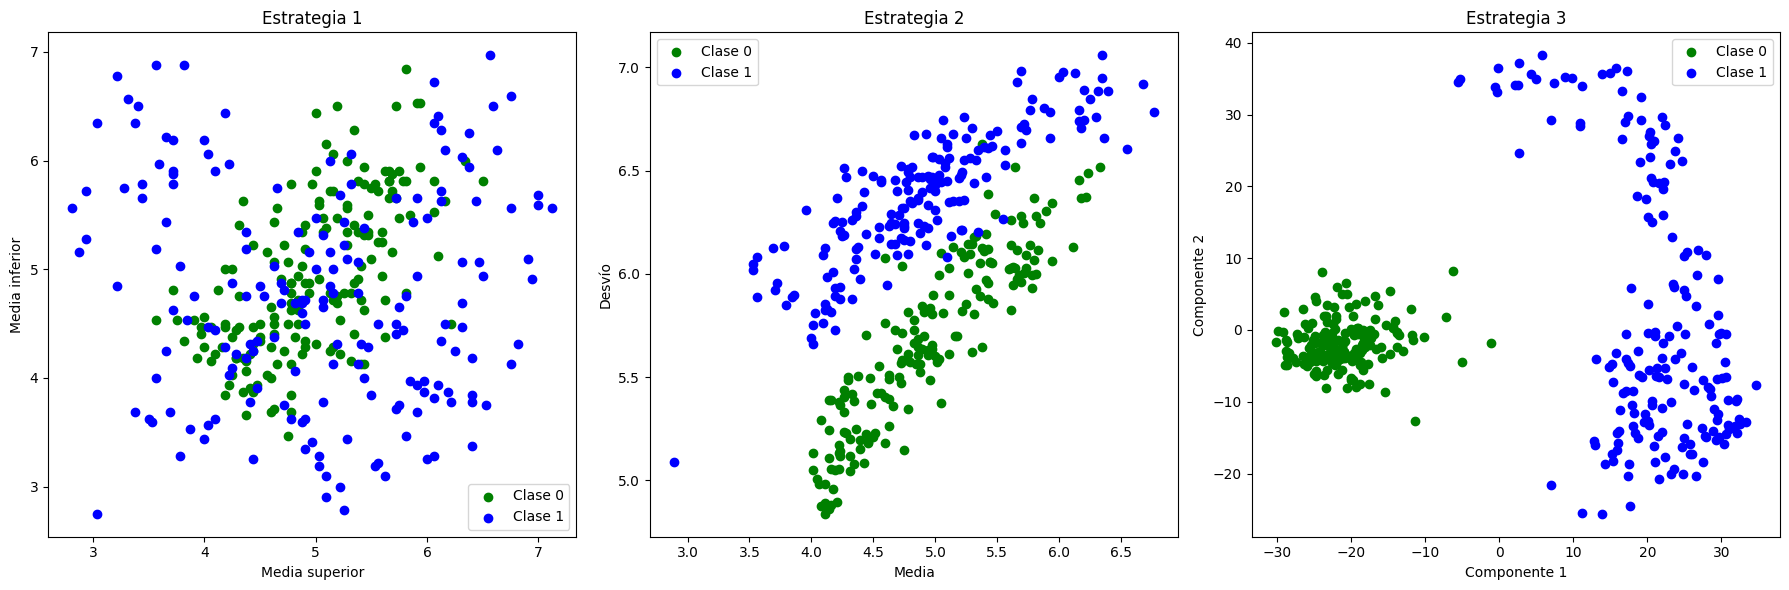

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tomamos todo el dataset para graficar
X = X_bin
y = y_bin

# Estrategia 1
X_features1 = preprocess_features_mean_top_bottom(X)

# Distinción de clases para la estrategia 1
Clase_1 = X_features1[y == 0]
Clase_2 = X_features1[y == 1]

# Grafico para la estrategia 1
axes[0].scatter(Clase_1[:, 0], Clase_1[:, 1], color='green', label='Clase 0')
axes[0].scatter(Clase_2[:, 0], Clase_2[:, 1], color='blue', label='Clase 1')
axes[0].set_xlabel('Media superior')
axes[0].set_ylabel('Media inferior')
axes[0].set_title('Estrategia 1')
axes[0].legend()

# Estrategia 2
X_features2 = preprocess_features_mean_std(X)

# Distinción de clases para la estrategia 2
Clase_1 = X_features2[y == 0]
Clase_2 = X_features2[y == 1]

# Grafico para la estrategia 2
axes[1].scatter(Clase_1[:, 0], Clase_1[:, 1], color='green', label='Clase 0')
axes[1].scatter(Clase_2[:, 0], Clase_2[:, 1], color='blue', label='Clase 1')
axes[1].set_xlabel('Media')
axes[1].set_ylabel('Desvío')
axes[1].set_title('Estrategia 2')
axes[1].legend()

# Estrategia 3
X_features3 = extract_features_pca(X).to_numpy()

# Distinción de clases para la estrategia 3
Clase_1 = X_features3[y == 0]
Clase_2 = X_features3[y == 1]

# Grafico para la estrategia 3
axes[2].scatter(Clase_1[:, 0], Clase_1[:, 1], color='green', label='Clase 0')
axes[2].scatter(Clase_2[:, 0], Clase_2[:, 1], color='blue', label='Clase 1')
axes[2].set_xlabel('Componente 1')
axes[2].set_ylabel('Componente 2')
axes[2].set_title('Estrategia 3')
axes[2].legend()

plt.tight_layout()
plt.show()

De lo anterior se observa que la estrategia 3, que utiliza componentes principales, logra hacer una separación clara de las dos clases en la dirección de la primera componente. En siguiente lugar, la estrategia dos también presenta una distinción bastante clara de las dos clases, aunque la frontera de los datos se solapa un poco. Por último, la primera estrategia es la que no logra separar los grupos de dígitos, teniendo un accuracy similar (apenas superior) a un clasificador random (que tiene un accuracy: 0.5).

### Extensión a los 10 dígitos

Ahora implementamos las estrategias con todos los dígitos.

In [ ]:
# Estrategia 1
clasificador = Perceptron()
X_train_est1 = preprocess_features_mean_top_bottom(X_train)
X_test_est1 = preprocess_features_mean_top_bottom(X_test)

# Entrenamiento
clasificador.fit(X_train_est1, y_train)

# Evaluación de accuracy
accuracy_est1 = clasificador.score(X_test_est1, y_test)
print("Accuracy de la muestra Test con Estrategia 1: " + str(np.round(accuracy_est1, 4)))

# Predicciones
predictions_est1 = clasificador.predict(X_test_est1)
print("Predicciones de la muestra Test con Estrategia 1: " + str(predictions_est1))

Accuracy de la muestra Test con Estrategia 1: 0.1667
Predicciones de la muestra Test con Estrategia 1: [4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 6 8 8 6 8 6 8 4 4 8 8 8
 8 8 6 6 8 8 8 6 8 8 8 6 8 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 4 8 8 8 8 8 8 8 8 8 4 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 6 6 8 8 8 8 8 8 6 8 8 6 8
 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 6 8 8 8 8 8
 8 8 8 8 6 8 8 8 8 6 8 8 8 4 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 8
 8 6 8 8 8 8 8 8 8 4 8 8 8 8 6 8 8 6 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8
 8 8 4 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 8 8 6 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 6 8 8 8 8 8 8

In [ ]:
# Estrategia 2
clasificador = Perceptron()
X_train_est2 = preprocess_features_mean_std(X_train)
X_test_est2 = preprocess_features_mean_std(X_test)

# Entrenamiento
clasificador.fit(X_train_est2, y_train)

# Evaluación de accuracy
accuracy_est2 = clasificador.score(X_test_est2, y_test)
print("Accuracy de la muestra Test con Estrategia 2: " + str(np.round(accuracy_est2, 4)))

# Predicciones
predictions_est2 = clasificador.predict(X_test_est2)
print("Predicciones de la muestra Test con Estrategia 2: " + str(predictions_est2))

Accuracy de la muestra Test con Estrategia 2: 0.1397
Predicciones de la muestra Test con Estrategia 2: [5 8 5 5 5 5 5 5 5 5 5 5 8 8 5 5 8 8 8 8 5 5 8 5 5 5 5 5 5 8 5 8 5 5 5 8 5
 5 5 5 5 5 5 5 5 8 5 8 5 5 8 8 5 8 5 8 5 8 5 5 0 8 8 5 5 8 8 5 8 5 8 5 8 5
 5 5 5 5 5 8 8 5 5 5 8 8 5 5 5 8 5 5 8 5 8 5 5 8 5 8 5 8 5 5 5 5 5 5 5 8 5
 5 5 5 5 5 5 5 8 8 8 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 5 5 5 8 8 5 5 5 8 5 5 5
 8 5 5 5 8 8 5 8 8 5 5 5 5 5 8 8 5 5 8 5 5 5 8 8 8 5 5 5 5 5 5 5 8 8 8 8 5
 5 5 5 5 8 8 5 5 5 8 5 8 8 5 8 5 8 8 5 8 8 5 8 5 8 8 5 8 5 5 5 5 8 5 5 8 8
 5 8 5 5 5 8 5 5 5 8 5 5 5 5 5 5 5 5 5 8 5 5 8 5 8 8 5 8 5 5 5 8 8 5 5 5 5
 8 5 8 8 5 5 5 5 8 5 8 8 5 5 5 5 5 5 8 5 5 5 5 5 5 8 8 5 8 8 5 5 5 5 5 8 5
 8 5 5 5 8 5 5 5 5 5 8 8 8 8 5 5 5 8 5 8 5 5 5 5 5 8 5 8 5 8 5 5 8 8 5 5 8
 5 8 5 5 8 8 5 5 5 5 8 5 8 5 8 8 5 5 8 5 8 5 5 5 8 8 8 5 8 8 5 5 8 8 8 8 5
 5 8 5 5 5 5 5 5 8 8 5 5 5 8 8 8 5 8 5 8 5 8 8 5 5 5 5 8 5 8 8 5 5 5 5 5 8
 8 5 5 5 5 5 5 8 5 5 8 5 8 5 8 8 5 8 8 5 8 5 5 8 5 5 5 8 8 8 8 8 8 5 5 8

In [ ]:
# Estrategia 3
clasificador = Perceptron()
X_train_est3 = extract_features_pca(X_train)
X_test_est3 = extract_features_pca(X_test)

# Entrenamiento
clasificador.fit(X_train_est3, y_train)

# Evaluación de accuracy
accuracy_est3 = clasificador.score(X_test_est3, y_test)
print("Accuracy de la muestra Test con Estrategia 3: " + str(np.round(accuracy_est3, 4)))

# Predicciones
predictions_est3 = clasificador.predict(X_test_est3)
print("Predicciones de la muestra Test con Estrategia 3: " + str(predictions_est3))

Accuracy de la muestra Test con Estrategia 3: 0.133
Predicciones de la muestra Test con Estrategia 3: [3 4 4 1 4 8 3 1 1 1 1 3 3 0 3 1 4 1 1 1 3 4 4 1 3 0 4 1 0 4 3 4 5 3 3 0 4
 3 1 3 0 4 3 4 3 1 4 0 0 5 1 3 4 1 0 0 4 8 0 3 8 3 8 1 3 4 1 0 1 8 4 4 0 3
 1 0 3 3 4 4 4 0 1 4 5 0 3 3 3 4 1 1 8 4 4 1 4 3 3 3 3 4 5 4 1 1 3 3 3 1 1
 1 3 3 3 4 8 1 8 3 4 0 4 3 0 1 4 1 1 8 1 1 1 1 0 0 0 3 1 1 0 4 3 0 5 8 0 4
 0 8 0 0 3 0 3 3 4 4 4 1 1 4 4 0 3 8 1 0 3 1 4 1 3 1 3 4 1 1 1 1 4 4 5 0 4
 1 1 1 3 4 4 3 3 8 3 1 4 0 3 8 4 4 4 1 1 4 3 1 3 1 3 3 4 0 3 4 0 0 3 3 4 1
 3 3 3 1 3 8 4 1 4 3 1 4 0 5 3 1 0 1 1 0 3 3 0 1 1 5 1 1 1 8 1 1 1 4 3 1 1
 4 0 0 4 1 1 0 3 0 3 4 3 8 4 0 0 3 1 0 0 4 3 4 4 3 4 8 4 4 4 3 1 4 4 3 0 3
 8 4 3 0 1 3 0 3 4 3 4 0 8 1 2 4 1 3 1 3 3 0 3 1 5 3 1 5 1 0 0 3 1 5 8 1 1
 3 1 1 3 4 8 8 0 3 1 0 3 4 8 4 1 1 1 3 0 4 1 3 4 8 4 4 0 0 0 4 0 4 3 0 3 1
 5 1 3 1 1 3 4 3 1 1 3 4 4 8 4 4 1 3 0 3 4 4 1 3 3 3 8 1 1 3 8 3 3 3 1 4 3
 0 1 1 4 3 1 1 3 4 1 0 3 4 3 3 4 1 3 1 1 4 0 1 1 1 4 3 4 4 0 4 4 0 1 4 1 

Graficamos nuevamente los datos según la estrategia y la clase:

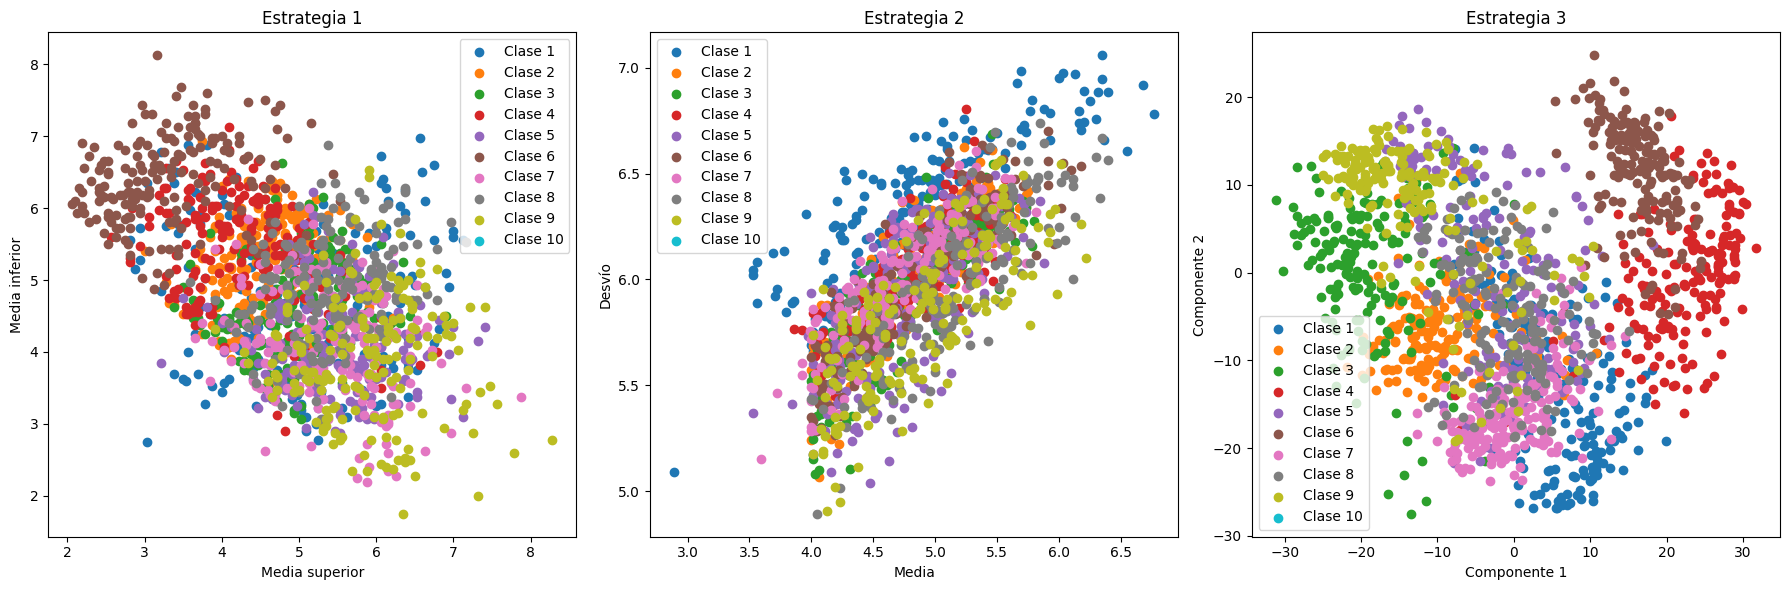

In [ ]:
# Totamos todo el dataset
X, y = digits.images, digits.target

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualización Estrategia 1
X_features = preprocess_features_mean_top_bottom(X)
for i in range(1, 11):
    axes[0].scatter(X_features[y == i][:, 0], X_features[y == i][:, 1], label=f'Clase {i}')
axes[0].set_xlabel('Media superior')
axes[0].set_ylabel('Media inferior')
axes[0].set_title('Estrategia 1')
axes[0].legend()

# Visualización Estrategia 2
X_features = preprocess_features_mean_std(X)
for i in range(1, 11):
    axes[1].scatter(X_features[y == i][:, 0], X_features[y == i][:, 1], label=f'Clase {i}')
axes[1].set_xlabel('Media')
axes[1].set_ylabel('Desvío')
axes[1].set_title('Estrategia 2')
axes[1].legend()

# Visualización Estrategia 3
X_features = extract_features_pca(X).to_numpy()
for i in range(1, 11):
    axes[2].scatter(X_features[y == i][:, 0], X_features[y == i][:, 1], label=f'Clase {i}')
axes[2].set_xlabel('Componente 1')
axes[2].set_ylabel('Componente 2')
axes[2].set_title('Estrategia 3')
axes[2].legend()

plt.tight_layout()
plt.show()

Considerando el accuracy, en este caso las tres estrategias se comportaron de forma similar, obteniendo resultados apenas superiores a un clasificador random (el cual tiene una accuracy teórica de 0.1).

La estrategia que mejor clasificó el dataset completo fue la estrategia 1 (media superior e inferior) con 0.1667. En segundo lugar se ubicó la estrategia de PCA con 0.1481. En último lugar estuvo la estrategia 2 (media y desvío) con 0.1397.

Como podemos ver en los gráficos anteriores, las clases son dificilmente diferenciables entre sí con estas estrategias, ya que las clases se superponen en una nube única de puntos.

En el caso de la estrategia 1, que su accuracy sea mejor probablemente se deba a que en la dimensión de la Media superior la clase correspondiente al número 6 se distingue mejor del resto de los dígitos. Algo similar ocurre con el número 4 en el caso de PCA, para la primer componente.

Por otro lado, vemos que hay separación entre las clases en el caso 3. Sin embargo, esta separación no es lineal en la dirección de alguna de las dos componentes principales y el perceptrón simple no logra captarla.

La inestabilidad de la tercera estrategia (observado a partir de la baja significativa de la performance), nos lleva a preguntarnos cuanto de la variabilidad están explicando las dos componentes, a fin de entender si la transformación lineal que se obtuvo representa adecuadamente los datos originales:

In [ ]:
pca = PCA(n_components=2)
forma_original = X_train.shape
matriz_X = X_train.reshape(forma_original[0], -1)
principal_components = pca.fit_transform(matriz_X)
ratio_var_exp = pca.explained_variance_ratio_ # Calculo de la varianza expicada por PC
var_acum = ratio_var_exp.cumsum() # Calculo acumulado
print("Varianza explicada acumulada en train:\n", var_acum)

forma_original = X_test.shape
matriz_X = X_test.reshape(forma_original[0], -1)
principal_components = pca.fit_transform(matriz_X)
ratio_var_exp = pca.explained_variance_ratio_ # Calculo de la varianza expicada por PC
var_acum = ratio_var_exp.cumsum() # Calculo acumulado
print("Varianza explicada acumulada en test:\n", var_acum)

Varianza explicada acumulada en train:
 [0.14906033 0.28617058]
Varianza explicada acumulada en test:
 [0.15199311 0.28670164]


Como podemos observar, al variabilidad total explicada por dos componentes es de ~28%. Este valor es  muybajo respecto a la referencia estándar que se toma como buen ajuste lineal en PCA, que ronda alrededor del 80%.
Entonces, proponemos hacer una última estrategia que tome más componentes principales, para ver si, de esta forma, aumenta la performance.

### Prueba con ampliación del modelo

Primero verificamos la cantidad de componentes que nos permiten acercanos a la varianza explicada deseada (alrededor del 80%):

In [ ]:
cant_comp = 12
pca = PCA(n_components=cant_comp)

# Train
forma_original = X_train.shape
matriz_X = X_train.reshape(forma_original[0], -1)
principal_components = pca.fit_transform(matriz_X)
ratio_var_exp = pca.explained_variance_ratio_ # Calculo de la varianza expicada por PC
var_acum = ratio_var_exp.cumsum() # Calculo acumulado
print("Varianza explicada acumulada en train:\n", var_acum)

# Test
forma_original = X_test.shape
matriz_X = X_test.reshape(forma_original[0], -1)
principal_components = pca.fit_transform(matriz_X)
ratio_var_exp = pca.explained_variance_ratio_ # Calculo de la varianza expicada por PC
var_acum = ratio_var_exp.cumsum() # Calculo acumulado
print("Varianza explicada acumulada en test:\n", var_acum)

Varianza explicada acumulada en train:
 [0.14906033 0.28617058 0.40506684 0.49029067 0.54623394 0.59588637
 0.63851201 0.67452949 0.70782715 0.73838724 0.76238458 0.78567647]
Varianza explicada acumulada en test:
 [0.15199311 0.28670164 0.40261796 0.48388568 0.54701444 0.59547296
 0.63971601 0.67758263 0.71290146 0.74312059 0.76682377 0.78838167]


Vemos que con 12 componentes se explica aproximadamente el 80% de la varianza. Ahora establecemos la estrategia de acuerdo a la cantidad de componentes definidas:

In [ ]:
# Función para extraer las componentes
def extract_features_pca4(x):
    pca = PCA(n_components=cant_comp)
    forma_original = x.shape
    matriz_X = x.reshape(forma_original[0], -1)
    principal_components = pca.fit_transform(matriz_X)
    x_out = pd.DataFrame(data=principal_components)
    return x_out

In [ ]:
# Estrategia 4
clasificador = Perceptron()
X_train_est4 = extract_features_pca4(X_train)
X_test_est4 = extract_features_pca4(X_test)

# Entrenamiento
clasificador.fit(X_train_est4, y_train)

# Evaluación de accuracy
accuracy_est4 = clasificador.score(X_test_est4, y_test)
print("Accuracy de la muestra Test con Estrategia 4: " + str(np.round(accuracy_est4, 4)))

# Predicciones
predictions_est4 = clasificador.predict(X_test_est4)
print("Predicciones de la muestra Test con Estrategia 4: " + str(predictions_est4))

Accuracy de la muestra Test con Estrategia 4: 0.2845
Predicciones de la muestra Test con Estrategia 4: [0 8 6 5 6 8 5 4 5 2 1 9 0 0 3 2 1 2 4 8 3 8 4 2 5 0 4 5 0 6 3 4 1 3 5 3 4
 2 2 3 0 4 3 6 3 1 6 6 0 5 5 1 4 5 5 0 1 7 0 9 5 3 5 2 3 5 5 9 2 5 4 0 5 0
 2 0 3 5 8 6 4 7 2 4 4 0 0 9 5 4 7 2 3 1 4 2 4 7 5 0 3 4 5 4 9 8 5 9 3 4 4
 2 2 5 3 4 2 2 8 7 2 0 8 9 0 2 6 2 5 3 2 5 2 5 6 0 0 9 2 7 0 4 3 0 4 9 0 4
 0 9 5 3 3 0 0 2 4 6 6 7 2 6 6 7 3 5 1 0 5 4 4 7 3 6 2 8 8 2 6 6 8 4 8 0 6
 6 2 5 0 4 4 0 3 5 9 6 4 3 5 8 5 4 5 2 2 4 2 3 1 5 3 5 4 0 2 8 0 7 9 5 6 8
 3 3 3 5 3 3 4 6 8 3 2 4 9 8 3 2 0 5 1 5 5 1 8 4 5 8 4 5 8 0 2 2 2 8 0 4 8
 4 0 0 4 2 7 0 1 7 3 6 7 5 8 0 0 3 1 0 3 4 3 5 4 2 1 5 6 4 4 8 5 4 6 2 0 5
 3 8 3 0 4 8 3 3 8 2 0 0 5 6 8 6 1 3 7 3 2 0 3 5 8 3 1 8 2 0 0 3 7 7 5 2 7
 9 5 7 5 4 8 5 0 3 6 3 5 4 8 4 5 2 2 2 7 4 8 3 1 7 6 6 0 0 3 1 0 5 3 3 7 1
 6 8 3 5 4 3 4 7 8 7 7 6 8 4 9 8 8 5 0 3 4 4 5 1 3 9 5 2 9 8 3 3 5 3 5 6 3
 0 5 1 6 3 5 2 3 4 7 0 5 4 5 5 4 5 3 4 8 4 0 8 5 2 8 0 4 4 0 4 5 0 2 5 5

Aumentando las componentes pudimos obtener practicamente el doble de accuracy que en la estrategia 3 original. Sin embargo, fue necesario aumentar la complejidad del modelo de forma significativa (6 veces más features que las propuestas originalmente).

Aunque se haya obtenido una mejor accuracy que en las estrategia de 2 dimensiones, seguimos teniendo una incertidumbre alta en la clasificación de los 10 digitos.

En conclusión, en un escenario binario la clasificación con solo dos features es factible y se obtiene una buena performance relacionada al accuracy. En todos los casos superiores al random.

Sin embargo, al aumentar las clases, el análisis de un perceptrón único no permite obtener los mismo resultados. Al complejizarse el problema, éste requiere un cambio de enfoque para poder obtener mejores resultados respecto al random.